In [104]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import json

# Data Preparation

FTEC6312 Final Project

1. Data Cleaning
  - import excel file and combine into df
  - combine "Data Date" and "Ticker Symbol" to "year_tic" and set as index
  - for missing value in "Cash", "unemployment rate", fill in mean value
2. Feature Selection
  - calculate 5 ratios to be features(X independent variables)
  - take natural log for NFLX annual close price & delete the first blank row

In [902]:
# Import data
# Data Cleaning
df = pd.read_excel("/Users/phyllis/Documents/UTD/20 Fall/6321 Advanced Statistical Methods/Final Project/NFLX.xlsx",header=[0],usecols='B,H,K:AC,AF')
df["year_tic"] = df["Data Date"].astype(str).str[:4] + df["Ticker Symbol"]
df.set_index('year_tic', inplace = True) #set the first column as index
df["Cash"].fillna(value=df['Cash'].mean(),inplace = True)

In [903]:
path = os.getcwd()
un_rate = pd.read_csv ('USUnemployment.csv',header=[0]) 
df_un_rate = pd.DataFrame(un_rate)

In [904]:
df_un_rate["Average"][54:72].values

array([5.78, 5.99, 5.54, 5.08, 4.61, 4.62, 5.8 , 9.28, 9.61, 8.93, 8.07,
       7.36, 6.16, 5.28, 4.88, 4.34, 3.89, 3.67])

In [905]:
ave = df_un_rate["Average"][54:72].values
df["Unem"] = ave

In [234]:
df

,Data Date,Ticker Symbol,Current Assets - Other - Total,Assets - Total,Common/Ordinary Equity - Total,Cash,Cash and Short-Term Investments,Cost of Goods Sold,Common Shares Outstanding,Debt in Current Liabilities - Total,...,Earnings Before Interest and Taxes,Inventories - Total,Liabilities - Total,Net Income (Loss),Receivables - Total,Revenue - Total,Stockholders Equity - Parent,Stockholders Equity - Total,Price Close - Annual - Fiscal,Unem
year_tic,,,,,,,,,,,,,,,,,,,,,
2002NFLX,20021231,NFLX,3.465,130.530,89.356,59.814000,103.610,51.659,22.446,1.231,...,-11.672,0.000,41.174,-21.947,0.000,152.806,89.356,89.356,11.01,5.783
2003NFLX,20031231,NFLX,3.755,176.012,112.708,89.894000,135.191,97.369,25.425,0.416,...,4.472,0.000,63.304,6.512,0.000,272.243,112.708,112.708,54.69,5.992
2004NFLX,20041231,NFLX,12.885,251.793,156.283,174.461000,174.461,188.254,52.732,0.068,...,19.354,0.000,95.510,21.595,0.000,506.228,156.283,156.283,12.33,5.542
2005NFLX,20051231,NFLX,31.435,364.681,226.252,212.256000,212.256,358.773,54.756,0.000,...,11.081,0.000,138.429,42.027,0.000,682.213,226.252,226.252,27.06,5.083
2006NFLX,20061231,NFLX,27.988,608.779,414.211,400.430000,400.430,469.849,68.612,0.000,...,62.914,0.000,194.568,49.082,0.000,996.660,414.211,414.211,25.86,4.608
2007NFLX,20071231,NFLX,29.090,647.020,430.749,177.439000,387.442,764.621,64.913,0.000,...,76.965,0.000,216.271,66.952,0.000,1205.340,430.749,430.749,26.62,4.617
2008NFLX,20081231,NFLX,45.485,617.946,347.155,139.881000,297.271,877.780,58.862,1.152,...,121.679,18.691,270.791,83.026,0.000,1371.161,347.155,347.155,29.89,5.800
2009NFLX,20091231,NFLX,53.442,679.734,199.143,134.224000,320.242,1041.227,53.440,1.410,...,187.379,37.329,480.591,115.860,0.000,1670.269,199.143,199.143,55.09,9.283
2010NFLX,20101231,NFLX,109.574,982.067,290.164,194.499000,350.387,1319.256,52.782,2.083,...,277.547,181.006,691.903,160.853,0.000,2162.625,290.164,290.164,175.70,9.608


In [906]:
# create 5 features
df["PEratio"]= (df["Price Close - Annual - Fiscal"]*df["Stockholders Equity - Parent"]) / (df["Revenue - Total"] * df["Cost of Goods Sold"])
df["EVEBITDA"]=(df["Common Shares Outstanding"]*df["Price Close - Annual - Fiscal"] +df["Debt in Current Liabilities - Total"]-df["Cash"]) / (df["Earnings Before Interest and Taxes"]+df["Depreciation and Amortization"])
df["DEratio"]=df["Liabilities - Total"]/df["Stockholders Equity - Total"]
df["annROE"]= (df["Net Income (Loss)"]-df["Dividends - Preferred/Preference"]) / df["Common/Ordinary Equity - Total"]
cur_A = df["Cash and Short-Term Investments"]+df["Current Assets - Other - Total"]+df["Inventories - Total"]+df["Receivables - Total"]
df["PBratio"]=df["Common Shares Outstanding"]*df["Price Close - Annual - Fiscal"] / (df["Assets - Total"]+cur_A-df["Liabilities - Total"]-df["Long-Term Debt - Total"])

In [236]:
df

,Data Date,Ticker Symbol,Current Assets - Other - Total,Assets - Total,Common/Ordinary Equity - Total,Cash,Cash and Short-Term Investments,Cost of Goods Sold,Common Shares Outstanding,Debt in Current Liabilities - Total,...,Revenue - Total,Stockholders Equity - Parent,Stockholders Equity - Total,Price Close - Annual - Fiscal,Unem,PEratio,EVEBITDA,DEratio,annROE,PBratio
year_tic,,,,,,,,,,,,,,,,,,,,,
2002NFLX,20021231,NFLX,3.465,130.530,89.356,59.814000,103.610,51.659,22.446,1.231,...,152.806,89.356,89.356,11.01,5.783,0.124631,12.735391,0.460786,-0.245613,1.261056
2003NFLX,20031231,NFLX,3.755,176.012,112.708,89.894000,135.191,97.369,25.425,0.416,...,272.243,112.708,112.708,54.69,5.992,0.232533,23.457354,0.561664,0.057778,5.526383
2004NFLX,20041231,NFLX,12.885,251.793,156.283,174.461000,174.461,188.254,52.732,0.068,...,506.228,156.283,156.283,12.33,5.542,0.020220,4.423591,0.611135,0.138179,1.892115
2005NFLX,20051231,NFLX,31.435,364.681,226.252,212.256000,212.256,358.773,54.756,0.000,...,682.213,226.252,226.252,27.06,5.083,0.025014,10.750416,0.611835,0.185753,3.152930
2006NFLX,20061231,NFLX,27.988,608.779,414.211,400.430000,400.430,469.849,68.612,0.000,...,996.660,414.211,414.211,25.86,4.608,0.022874,6.243473,0.469732,0.118495,2.105679
2007NFLX,20071231,NFLX,29.090,647.020,430.749,177.439000,387.442,764.621,64.913,0.000,...,1205.340,430.749,430.749,26.62,4.617,0.012442,15.739657,0.502081,0.155432,2.039446
2008NFLX,20081231,NFLX,45.485,617.946,347.155,139.881000,297.271,877.780,58.862,1.152,...,1371.161,347.155,347.155,29.89,5.800,0.008621,10.514661,0.780029,0.239161,2.623544
2009NFLX,20091231,NFLX,53.442,679.734,199.143,134.224000,320.242,1041.227,53.440,1.410,...,1670.269,199.143,199.143,55.09,9.283,0.006308,12.470758,2.413296,0.581793,7.880449
2010NFLX,20101231,NFLX,109.574,982.067,290.164,194.499000,350.387,1319.256,52.782,2.083,...,2162.625,290.164,290.164,175.70,9.608,0.017869,28.770779,2.384524,0.554352,13.305152


In [907]:
# Log return
i = 1
naturalLog = [""]
for i in range(1,len(df)):

    naturalLog.append(np.log(df.iloc[i, 21] / df.iloc[i-1, 21]))
    
df["Natural Log"] = naturalLog # 17 log returns

In [908]:
# Data Cleaning - delete first row blank
df['Natural Log'].replace('', np.nan, inplace=True)
df.dropna(subset=['Natural Log'], inplace=True)

In [909]:
df

,Data Date,Ticker Symbol,Current Assets - Other - Total,Assets - Total,Common/Ordinary Equity - Total,Cash,Cash and Short-Term Investments,Cost of Goods Sold,Common Shares Outstanding,Debt in Current Liabilities - Total,...,Stockholders Equity - Parent,Stockholders Equity - Total,Price Close - Annual - Fiscal,Unem,PEratio,EVEBITDA,DEratio,annROE,PBratio,Natural Log
year_tic,,,,,,,,,,,,,,,,,,,,,
2003NFLX,20031231,NFLX,3.755,176.012,112.708,89.894000,135.191,97.369,25.425,0.416,...,112.708,112.708,54.69,5.992,0.232533,23.457354,0.561664,0.057778,5.526383,1.602877
2004NFLX,20041231,NFLX,12.885,251.793,156.283,174.461000,174.461,188.254,52.732,0.068,...,156.283,156.283,12.33,5.542,0.020220,4.423591,0.611135,0.138179,1.892115,-1.489646
2005NFLX,20051231,NFLX,31.435,364.681,226.252,212.256000,212.256,358.773,54.756,0.000,...,226.252,226.252,27.06,5.083,0.025014,10.750416,0.611835,0.185753,3.152930,0.786021
2006NFLX,20061231,NFLX,27.988,608.779,414.211,400.430000,400.430,469.849,68.612,0.000,...,414.211,414.211,25.86,4.608,0.022874,6.243473,0.469732,0.118495,2.105679,-0.045359
2007NFLX,20071231,NFLX,29.090,647.020,430.749,177.439000,387.442,764.621,64.913,0.000,...,430.749,430.749,26.62,4.617,0.012442,15.739657,0.502081,0.155432,2.039446,0.028965
2008NFLX,20081231,NFLX,45.485,617.946,347.155,139.881000,297.271,877.780,58.862,1.152,...,347.155,347.155,29.89,5.800,0.008621,10.514661,0.780029,0.239161,2.623544,0.115861
2009NFLX,20091231,NFLX,53.442,679.734,199.143,134.224000,320.242,1041.227,53.440,1.410,...,199.143,199.143,55.09,9.283,0.006308,12.470758,2.413296,0.581793,7.880449,0.611444
2010NFLX,20101231,NFLX,109.574,982.067,290.164,194.499000,350.387,1319.256,52.782,2.083,...,290.164,290.164,175.70,9.608,0.017869,28.770779,2.384524,0.554352,13.305152,1.159810
2011NFLX,20111231,NFLX,113.337,3069.196,642.810,508.053000,797.811,1996.154,55.399,2.319,...,642.810,642.810,69.29,8.933,0.006963,7.772262,3.774655,0.351777,1.879945,-0.930477


In [333]:
print(np.average(df['Unem']))
print(np.average(df['PEratio']))
print(np.average(df['EVEBITDA']))
print(np.average(df['DEratio']))
print(np.average(df['annROE']))
print(np.average(df['PBratio']))
print(np.average(df['Natural Log']))

6.065176470588235
0.027621731872411914
43.81199829704478
2.4529697563296664
0.19952648408400675
3.3282068391477915
0.19885950135920286


# Data Statistics

1. Correlation map for 6 features(Xs) and stock return(Y)
2. Box Polt for 6 features
3. Scatter for EV/EBITDA and D/E ratio
4. Plot lines for features during time period from 2003-2019

Text(0.5,1,'Correlation Map between Features')

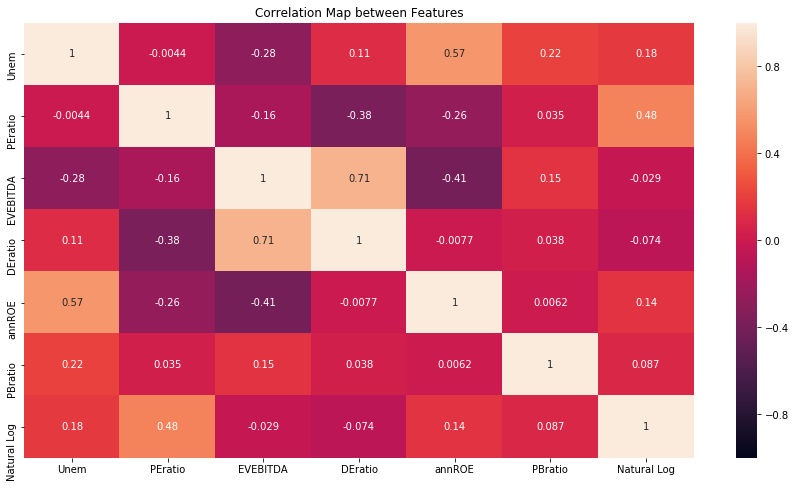

In [707]:
import seaborn as sb
plt.figure(figsize = (15,8))
corrmat = df.iloc[:,22:-1].corr()
sb.heatmap(corrmat, vmax = 1, vmin = -1, annot = True)
plt.title("Correlation Map between Features")

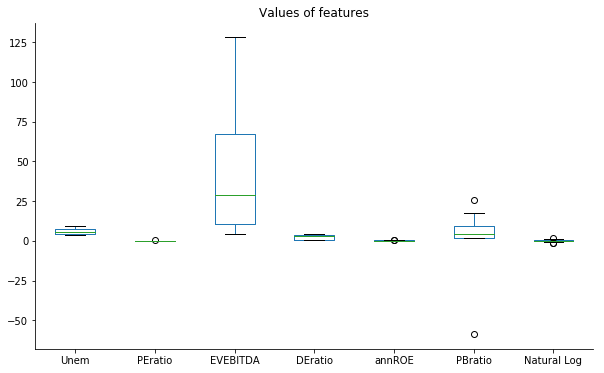

In [725]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
boxplot = df.iloc[:,22:29].boxplot(grid = False)
plt.title("Values of features")
plt.show()

/Users/phyllis/anaconda3/lib/python3.6/site-packages/matplotlib/collections.py:902: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


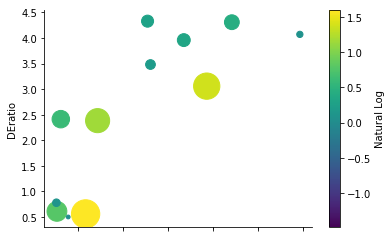

In [731]:
figsize=(10,8)
df.plot.scatter(x='EVEBITDA',y='DEratio',c='Natural Log',colormap='viridis',s=df['Natural Log']*500)

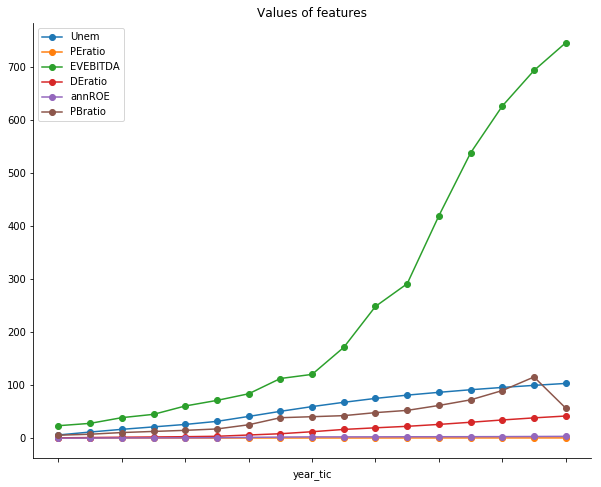

In [919]:
df_selected = df.iloc[:,22:-1]
df_selected = df_selected.cumsum()
#plt.figure(figsize=(10,8))
df_selected.plot(marker='o',figsize=(10,8))
plt.title("Values of features")
plt.show()

/Users/phyllis/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:641: UserWarning: Unrecognized location "lower". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


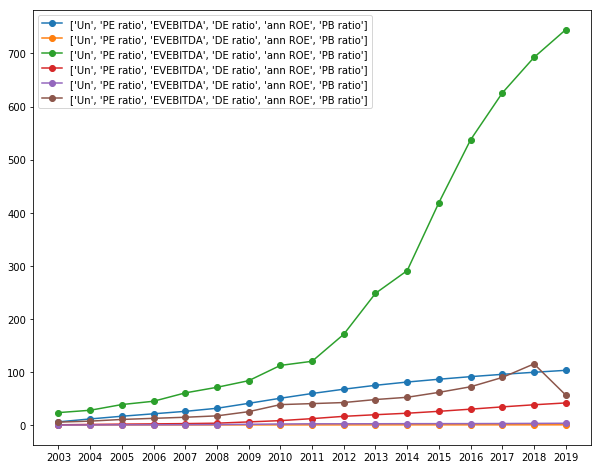

In [438]:
df_selected = df.iloc[:,22:-1]
df_selected = df_selected.cumsum()
x = ['2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']
plt.figure(figsize=(10,8))
#plt.xlabel(year,fontsize=50)
#plt.ylabel(value,fontsize=50)
plt.plot(x,df_selected,marker='o',label = ['Un','PE ratio','EVEBITDA','DE ratio','ann ROE','PB ratio'])
#plt.legend(handles=df.iloc[:,22:-1], labels=['Un','PE ratio','EVEBITDA','DE ratio','ann ROE','PB ratio'],  loc='lower right')
plt.legend(loc='lower')
#plt.show()

In [220]:
list(df.columns[22:-1])

['Average', 'PEratio', 'EVEBITDA', 'DEratio', 'annROE', 'PBratio']

# Data Sampling

1. 
   - X features: 6 independent columns(unem,PE,EVEBITDA,DE,ROE,PB)
   - Y targer: 1 dependent columns(stock return)
2. 
   - training set: 80% of the whole dataset
   - test set: 20% of the whole dataset

In [947]:
# Data Sampling 

X = df.iloc[:, 22:-1].values
Y = df.iloc[:,-1].values

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2, random_state=42)


# Fit the models & results

### 1. Multiple Linear Regression Model

(1) train the model and fit the regression

In [912]:
# train multiple regression model on the training set
from sklearn.linear_model import LinearRegression
regressor_multi = LinearRegression()
regressor_multi.fit(X_train, Y_train)

LinearRegression()

(2) predict the test set with the regression

(3) calculate the R squared and RMSE

(4) print the results for the test data and the actual data

In [914]:
predict_multi = regressor_multi.predict(X_test)
test_multi = pd.DataFrame(np.concatenate((predict_multi.reshape(len(predict_multi),1), Y_test.reshape(len(Y_test),1)),1), 
                    columns = ['Predicted', 'Actual'])
test_multi["Difference"] = predict_multi - Y_test
rmse = np.sqrt(MSE(Y_test, predict_multi)) 
print("R-squared:", r2_score(Y_test, predict_multi))
print("Root MSE:",rmse)
test_multi

R-squared: -9.300377302628693
Root MSE: 3.5279414941540983


,Predicted,Actual,Difference
0,8.458424,1.602877,6.855547
1,0.144316,-1.489646,1.633962
2,-0.117129,0.115861,-0.232990
3,0.081743,0.332431,-0.250688


(5) plot the line of test data and the actual data

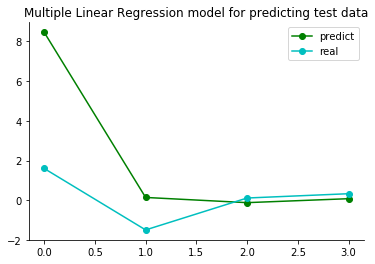

In [920]:
plt.plot(predict_multi, 'go-', label="predict")
plt.plot(Y_test, 'co-', label="real")
plt.title("Multiple Linear Regression model for predicting test data")
plt.legend()
plt.show()

### 2. Polynomial Regression Model

(1) train the model and fit the regression

In [916]:
# train the Polynomial Regression Model of the whole dataset
from sklearn.preprocessing import PolynomialFeatures
regressor_poly = PolynomialFeatures(degree = 2)
X_train_poly = regressor_poly.fit_transform(X_train)
X_test_poly = regressor_poly.fit_transform(X_test)
regressor_lin2 = LinearRegression()
regressor_lin2.fit(X_train_poly, Y_train)

LinearRegression()

(2) predict the test set with the regression

(3) calculate the R squared and RMSE

(4) print the results for the test data and the actual data

In [917]:
predict_poly = regressor_lin2.predict(X_test_poly)
test_poly = pd.DataFrame(np.concatenate((predict_poly.reshape(len(predict_poly),1), Y_test.reshape(len(Y_test),1)),1), 
                    columns = ['Predicted', 'Actual'])
test_poly["Difference"] = predict_poly - Y_test
rmse = np.sqrt(MSE(Y_test, predict_poly)) 
print("R-squared:", r2_score(Y_test, predict_poly))
print("Root MSE:",rmse)
test_poly

R-squared: -3.881146599837657
Root MSE: 2.42859856168806


,Predicted,Actual,Difference
0,5.703038,1.602877,4.100161
1,0.744389,-1.489646,2.234034
2,1.038066,0.115861,0.922205
3,-0.636936,0.332431,-0.969366


(5) plot the line of test data and the actual data

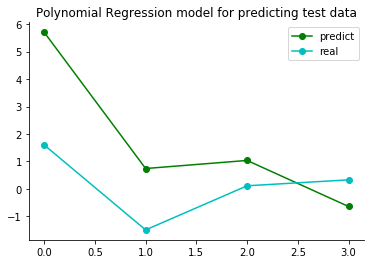

In [950]:
plt.plot(predict_poly, 'go-', label="predict")
plt.plot(Y_test, 'co-', label="real")
plt.title("Polynomial Regression model for predicting test data")
plt.legend()
plt.show()

6. Visualize the linear regression and the polynomial regression of the whole dataset

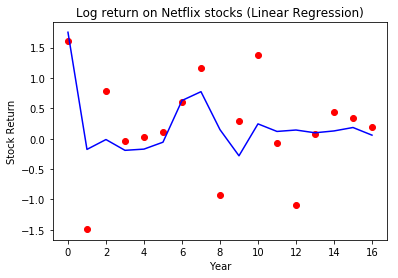

In [268]:
# Visualising the result of linear regression
X_converted =np.arange(0,len(X),1)
plt.scatter(X_converted, Y, color = 'red')
plt.plot(X_converted, lin_reg.predict(X), color = 'blue')
plt.title('Log return on Netflix stocks (Linear Regression)')
plt.xlabel('Year')
plt.ylabel('Stock Return')
plt.show()

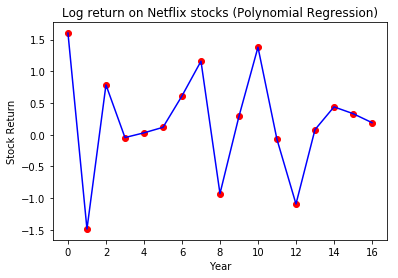

In [282]:
# Visualising the result of polynomial regression
plt.scatter(X_converted, Y, color = 'red')
plt.plot(X_converted, regressor_lin2.predict(regressor_poly.fit_transform(X)), color = 'blue')
plt.title('Log return on Netflix stocks (Polynomial Regression)')
plt.xlabel('Year')
plt.ylabel('Stock Return')
plt.show()

### 3. Support Vector Regression (SVR) 

(1) optimize the parameters(gamma, C, kernel) to see what values give the best score

In [926]:
# Grid Search for SVR
best_score = 0
for gamma in [0.001,0.01,0.1,1,10,100]:
    for C in [0.001,0.01,0.1,1,10,100]:
        grid_SVR = SVR(gamma=gamma,C=C) #train with each possible set of parameters
        grid_SVR.fit(X_train,Y_train)
        score = grid_SVR.score(X_test,Y_test)
        if score > best_score:#find the best parameter
            best_score = score
            best_parameters = {'gamma':gamma,'C':C}

print("Best score:{:.2f}".format(best_score))
print("Best parameters:{}".format(best_parameters))

Best score:0.39
Best parameters:{'gamma': 0.001, 'C': 10}


(2) optimize the parameters(kernel) to see what values give the best R Squared value

(3) predict the test set with the regression

In [794]:
# optimized kernel = linear, poly, rbf
from sklearn.metrics import r2_score

r2=[]
r2_single=[]
for k in ('linear', 'poly', 'rbf'):
    regressor_SVR = SVR(kernel=k, C=10, gamma=0.001) #c=1.25
    regressor_SVR.fit(X_train, Y_train)
    predict_SVR = regressor_SVR.predict(X_test)
    test_SVR = pd.DataFrame(np.concatenate((predict_SVR.reshape(len(predict_SVR),1), Y_test.reshape(len(Y_test),1)),1), 
                        columns = ['Predicted', 'Actual'])
    test_SVR["Difference"] = predict_SVR - Y_test
    r2_single = r2_score(Y_test, predict_SVR)
    r2.append(r2_score(Y_test, predict_SVR))
    print("When kernel is:",k)
    print("R-squared:\n", r2_single)
    print("\n")


print("Highest R-squared:", np.max(r2))
test_SVR

When kernel is: linear
R-squared:
 0.9689837455295304


When kernel is: poly
R-squared:
 -0.09079261827216567


When kernel is: rbf
R-squared:
 0.6331605222583325


Highest R-squared: 0.9689837455295304


,Predicted,Actual,Difference
0,0.734156,[1.2886722276488496],[-0.5545166064291637]
1,-0.0911036,[-0.7695666526435794],[0.6784630520239509]
2,0.265037,[0.37397067310477133],[-0.10893346329798514]
3,0.28286,[0.3071192285188524],[-0.024259561884265757]


(4) trian the model and fit the regression

(5) predict the test set with the regression

(6) calculate the R squared and RMSE

(7) print the results for the test data and the actual data

In [839]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error as MSE
regressor_SVR = SVR(kernel = 'linear', C=10, gamma=0.001)
regressor_SVR.fit(X_train, Y_train)
predict_SVR = regressor_SVR.predict(X_test)
rmse = np.sqrt(MSE(Y_test, predict_SVR)) 
print("R-squared:", r2_score(Y_test, predict_SVR))
print("Root MSE:",rmse)

R-squared: 0.9689837455295304
Root MSE: 0.12842369197829748


(8) plot the line of test data and the actual data

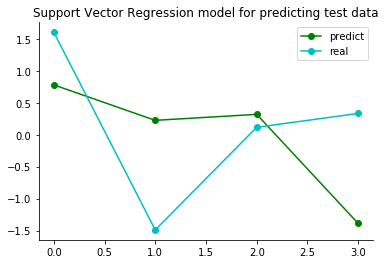

In [956]:
plt.plot(predict_SVR, 'go-', label="predict")
plt.plot(Y_test, 'co-', label="real")
plt.title("Support Vector Regression model for predicting test data")
plt.legend()
plt.show()

### 4. Decision Tree Regression

(1) optimize the parameters(max_depth, min_sample_leaf, min_sample_split) to see what values give the best score

In [816]:
# Find the optimized parameters
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth':np.arange(2,10),
    'min_samples_leaf':np.arange(1, 8),
    'min_samples_split':np.arange(2, 8)}

rfc = DecisionTreeRegressor(random_state=0)
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(X,Y)
print(GS.best_params_)
print(GS.best_score_)

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

{'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
nan


/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


(2) compare the optimized max_dapth with the actual data

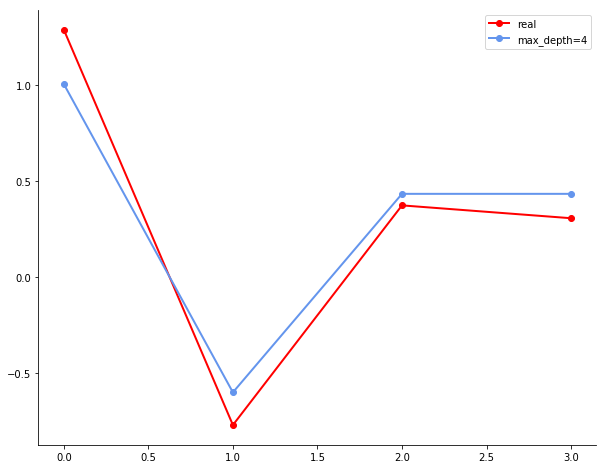

In [809]:
from sklearn import tree
dtr=tree.DecisionTreeRegressor(max_depth=2)  
dtr.fit(X_train,Y_train)
y1=dtr.predict(X_test)

plt.figure(figsize=(10,8))
plt.plot(Y_test, color="red",marker='o',linewidth=2, label="real")
plt.plot(y1,color="cornflowerblue",marker='o',label="max_depth=4", linewidth=2)
#plt.plot(y2,color="yellowgreen", label="max_depth=6", linewidth=4,alpha=0.5)
#plt.plot(y3,color="orchid", label="max_depth=8", linewidth=4,alpha=0.5)
#plt.plot(y4,color="goldenrod", label="max_depth=10", linewidth=2)

plt.legend()

(3) train the model and fit the regression with training set

In [942]:
from sklearn.tree import DecisionTreeRegressor
regressor_DT = DecisionTreeRegressor(max_depth=2,min_samples_leaf=1, min_samples_split=2)
regressor_DT.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=2)

(4) predict the test set with the regression

(5) calculate the R squared and RMSE

(6) print the results for the test data and the actual data

In [840]:
predict_DT = regressor_DT.predict(X_test)
test_DT = pd.DataFrame(np.concatenate((predict_DT.reshape(len(predict_DT),1), Y_test.reshape(len(Y_test),1)),1), 
                    columns = ['Predicted', 'Actual'])
test_DT["Difference"] = predict_DT - Y_test
rmse = np.sqrt(MSE(Y_test, predict_DT)) 
print("R-squared:", r2_score(Y_test, predict_DT))
print("Root MSE:",rmse)
test_DT

R-squared: 0.9394825565105263
Root MSE: 0.17938691539502538


,Predicted,Actual,Difference
0,1.00569,[1.2886722276488496],[-0.28297901976079065]
1,-0.599501,[-0.7695666526435794],[0.17006594110832352]
2,0.434045,[0.37397067310477133],[0.06007442179334177]
3,0.434045,[0.3071192285188524],[0.12692586637926068]


(7) plot the line of test data and the actual data

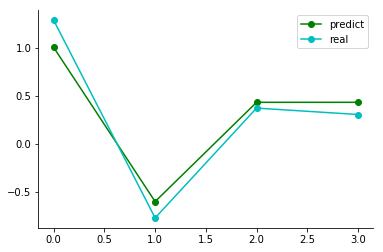

In [750]:
plt.plot(predict_DT, 'go-', label="predict")
plt.plot(Y_test, 'co-', label="real")
plt.legend()
plt.show()

### 5. Random Forest Regression

(1) optimize the parameters(max_depth, min_sample_leaf, min_sample_split, n_estimators, random_state) to see what values give the best score

In [973]:
# Find the optimized parameters
param_grid = {
    'n_estimators':np.arange(1,10),
    'max_depth':np.arange(2,10,2),
    'random_state':np.arange(1,2),
    'min_samples_leaf':np.arange(1,10),
    'min_samples_split':np.arange(2,10,2)}

rfc = RandomForestRegressor(random_state=0)
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(X,Y)
print(GS.best_params_)
print(GS.best_score_)

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-d

{'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1, 'random_state': 1}
nan


/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


(3) train the model and fit the regression with training set

In [974]:
from sklearn.ensemble import RandomForestRegressor
regressor_RF = RandomForestRegressor(max_depth=2, min_samples_leaf=1,
                                     min_samples_split=2, n_estimators = 1,
                                     random_state = 1)
regressor_RF.fit(X_train, Y_train)

RandomForestRegressor(max_depth=2, n_estimators=1, random_state=1)

(4) predict the test set with the regression

(5) calculate the R squared and RMSE

(6) print the results for the test data and the actual data

In [841]:
predict_RF = regressor_RF.predict(X_test)
test_RF = pd.DataFrame(np.concatenate((predict_RF.reshape(len(predict_RF),1), Y_test.reshape(len(Y_test),1)),1), 
                    columns = ['Predicted', 'Actual'])
test_RF["Difference"] = predict_RF - Y_test
rmse = np.sqrt(MSE(Y_test, predict_RF)) 
print("R-squared:", r2_score(Y_test, predict_RF))
print("Root MSE:",rmse)
test_RF

R-squared: 0.9192616926619945
Root MSE: 0.20720025979309406


,Predicted,Actual,Difference
0,1.06726,[1.2886722276488496],[-0.2214117092910486]
1,-0.599501,[-0.7695666526435794],[0.17006594110832352]
2,0.554493,[0.37397067310477133],[0.18052247643216074]
3,0.554493,[0.3071192285188524],[0.24737392101807965]


(7) plot the line of test data and the actual data

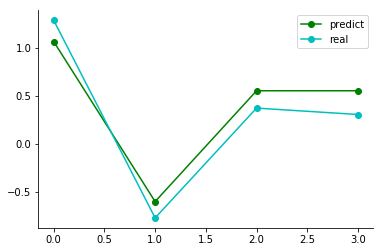

In [765]:
plt.plot(predict_RF, 'go-', label="predict")
plt.plot(Y_test, 'co-', label="real")
plt.legend()
plt.show()